# Logistic regression

### Binary logistic regression

In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


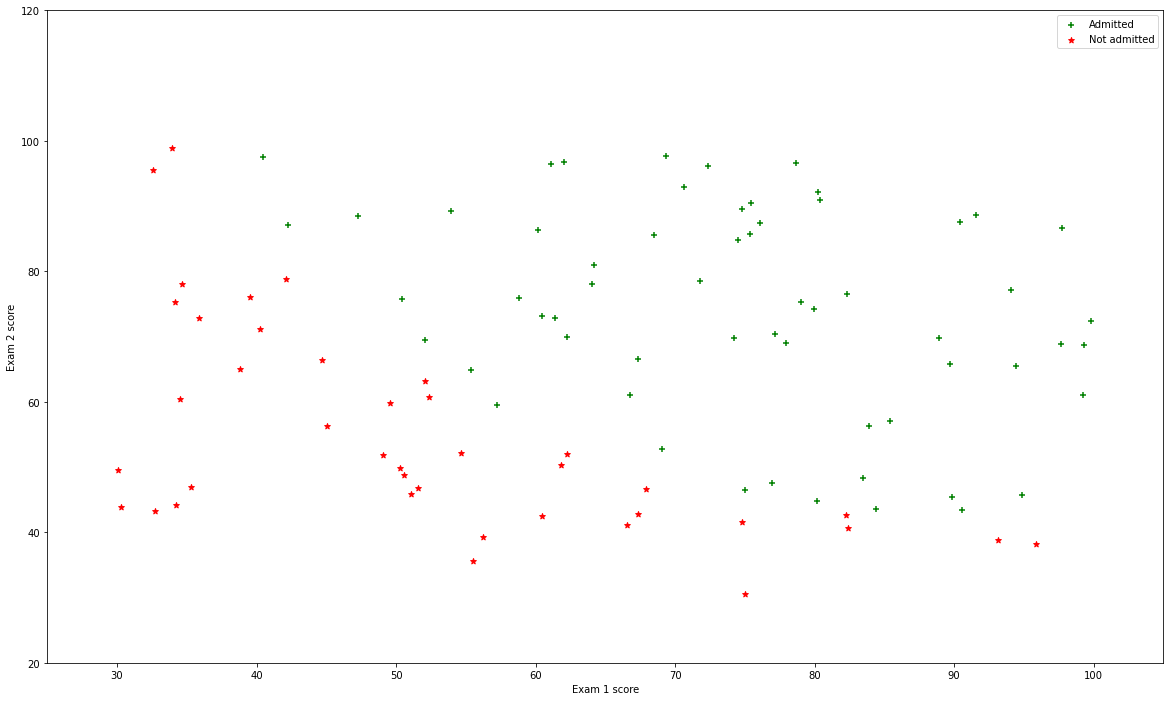

In [419]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

m , n = X.shape[0], X.shape[1]
X = (X-X.mean())/(X.std())
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)

# ploting data
plt.figure(figsize=(20,12))
plt.scatter(data[data["Admitted"] == 1]['Exam 1'],data[data["Admitted"] == 1]['Exam 2'], marker = '+', color = 'g', label = "Admitted")
plt.scatter(data[data["Admitted"] == 0]['Exam 1'],data[data["Admitted"] == 0]['Exam 2'], marker = '*', color = 'r', label = "Not admitted")
plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 score")
plt.legend(loc = "upper right")
plt.axis([25, 105, 20, 120])
plt.show()

In [420]:
def sig(t):
  return 1/(1 + np.exp((-1)*t))

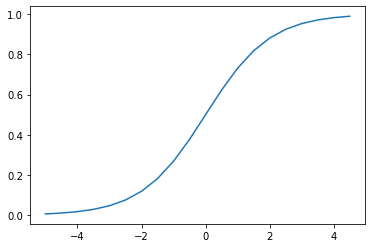

In [421]:
data_gen = np.arange(-5,5,0.5)

plt.figure()
plt.plot(data_gen,sig(data_gen))
plt.show()

In [422]:
def cost(theta, X, y):
    m=len(y)
    h_x = sig(np.dot(X,theta))
    cost = 1/m * np.sum((-y * np.log(h_x)) - ((1-y)*np.log(1-h_x)))
    return cost
    
theta = np.zeros((3,1))
print(cost(theta,X,y))

0.6931471805599453


In [423]:
# calculating theta and cost
def simple_gradient(X, y, theta, alpha, it):
    m=len(y)
    J_history =[]
    for i in range(it):
        cost_ = cost(theta,X,y)
        h_x = sig(np.dot(X,theta))     
        grad = 1/m * np.dot(X.transpose(),(h_x - y))
        theta = theta - (alpha * grad)
        J_history.append(cost_) 
    return theta , J_history[-1]

alpha = 1
it = 400
theta, cost_ = simple_gradient(X,y,theta,alpha,it)
print("Cost function: {}".format(cost_))
print("Theta: {}".format(theta))


Cost function: 0.20360075017627055
Theta: [[1.66076085]
 [3.78163527]
 [3.6892621 ]]


In [424]:
# chcecking accuracy
h_x = X.dot(theta)   
p = h_x>0.5
print("Train Accuracy: {} %".format(sum(p==y)[0]))

Train Accuracy: 88 %


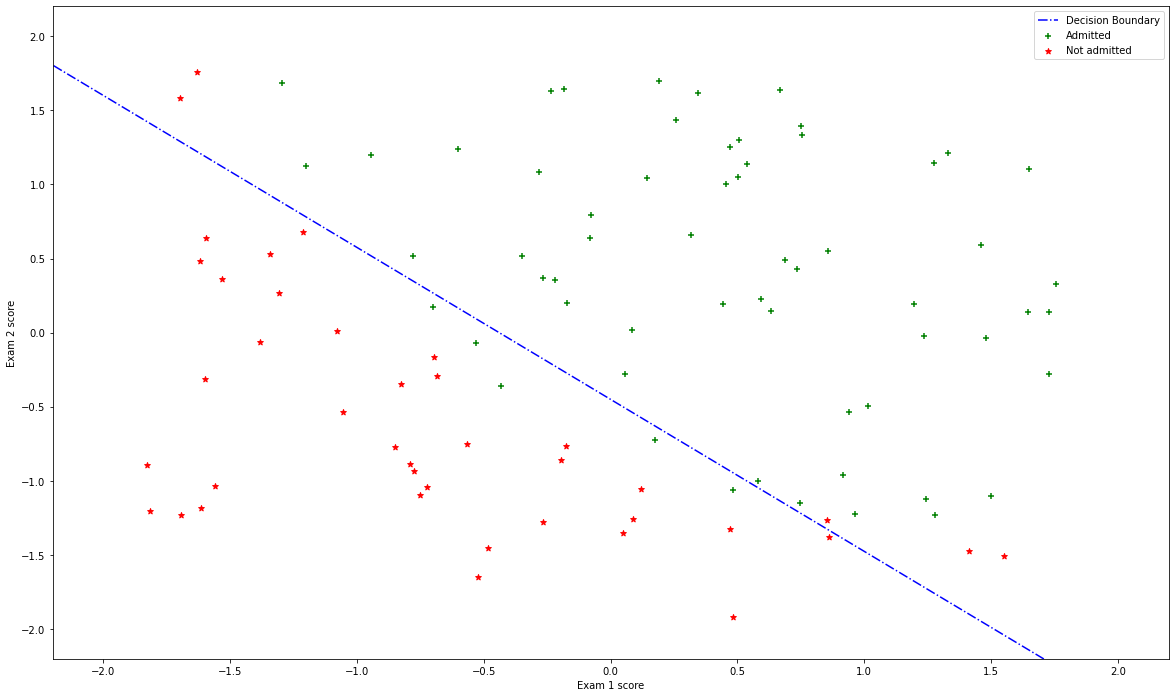

In [425]:
# ploting decision boundary
plot_x = np.array([X.min()-1,X.max()+1])
plot_y = -(theta[0]+theta[1]*plot_x)/theta[2]

data2 = (data-data.mean())/(data.std())
plt.figure(figsize=(20,12))
plt.scatter(data2[data["Admitted"] == 1]['Exam 1'],data2[data["Admitted"] == 1]['Exam 2'], marker = '+', color = 'g', label = "Admitted")
plt.scatter(data2[data["Admitted"] == 0]['Exam 1'],data2[data["Admitted"] == 0]['Exam 2'], marker = '*', color = 'r', label = "Not admitted")
plt.plot(plot_x,plot_y,'b-.',label = "Decision Boundary")
plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 score")
plt.legend(loc = "upper right")
plt.axis([-2.2, 2.2,-2.2,2.2])
plt.show()


# Logistic regression - Python

### Multi-class logistic regression

<ipython-input-426-1536c13f0de0>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


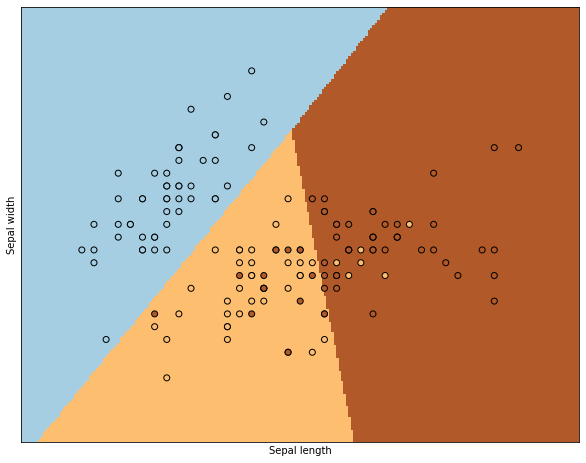

In [426]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5,penalty = 'l2',random_state = 42)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [427]:
logreg.predict_proba(X)     # predicting the probability of being a member of a given class

array([[1.00000000e+00, 1.31551092e-13, 1.91419142e-14],
       [9.99999965e-01, 3.24521011e-08, 2.63646436e-09],
       [1.00000000e+00, 6.61524598e-17, 3.98330874e-18],
       [1.00000000e+00, 3.15404322e-17, 1.50790306e-18],
       [1.00000000e+00, 5.93944739e-18, 7.44040182e-19],
       [1.00000000e+00, 1.18112130e-14, 3.57550827e-15],
       [1.00000000e+00, 2.90644794e-23, 1.56890186e-24],
       [1.00000000e+00, 6.27214516e-14, 7.24627514e-15],
       [1.00000000e+00, 7.16986411e-18, 2.16088837e-19],
       [1.00000000e+00, 3.15796858e-10, 2.67154630e-11],
       [1.00000000e+00, 1.24728173e-10, 3.48222009e-11],
       [1.00000000e+00, 1.35017271e-18, 1.06624081e-19],
       [1.00000000e+00, 1.50566878e-10, 1.01132830e-11],
       [1.00000000e+00, 3.23714763e-22, 8.39930511e-24],
       [9.99999585e-01, 2.48034928e-07, 1.67339102e-07],
       [1.00000000e+00, 1.03195204e-17, 6.76754253e-18],
       [1.00000000e+00, 1.18112130e-14, 3.57550827e-15],
       [1.00000000e+00, 1.31551

In [428]:
# Evaluation 
from sklearn.model_selection import cross_val_score

score = logreg.score(X, Y)
print('Test accuracy score:', score)

scores = cross_val_score(logreg, X, Y, cv=10)
print('Cross-validation accuracy scores: ', scores)

Test accuracy score: 0.8333333333333334
Cross-validation accuracy scores:  [0.66666667 0.8        0.86666667 0.86666667 0.8        0.66666667
 0.93333333 0.8        0.86666667 0.86666667]
